In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from collections import Counter
#from plotly import graph_objs
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn import metrics, svm, model_selection, feature_extraction, linear_model, tree, ensemble, preprocessing, cross_validation
from sklearn.metrics import f1_score,  precision_score, recall_score, accuracy_score, roc_curve, auc
from sklearn.cross_validation import train_test_split
from scipy import interp
from itertools import cycle
import os
# import packages



/home/bayes/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


In [3]:
fileAddress=os.path.join(os.getcwd(), 'creditcard.csv')
print('Start to loading first data from this file: \n', fileAddress)

Start to loading first data from this file: 
 /home/bayes/Academic/Sensoy/project3/creditcard.csv


In [115]:
# looking at the data
CredData = pd.read_csv(fileAddress)
colNames = CredData.columns.values
print(colNames)
print(CredData.describe())

['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class']
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.8480

In [116]:
# data shape
print("Dimension of dataset:", CredData.shape)



Dimension of dataset: (284807, 31)


In [129]:
# Distribution of the fraud
# simple counting

print("Normal transaction (class = 0):", CredData['Class'][CredData['Class'] == 0].count()) 
print("Fraudulent transaction (class = 1):", CredData['Class'][CredData['Class'] == 1].count()) 

# separating
class0 = CredData.query('Class == 0')
class1 = CredData.query('Class == 1')
print("class0:\n", class0)   
print("class1:\n", class1)  
# shuffling the dataset
class0 = class0.sample(frac=1)
class1 = class1.sample(frac=1)

Normal transaction (class = 0): 284315
Fraudulent transaction (class = 1): 492
class0:
             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300

/home/bayes/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


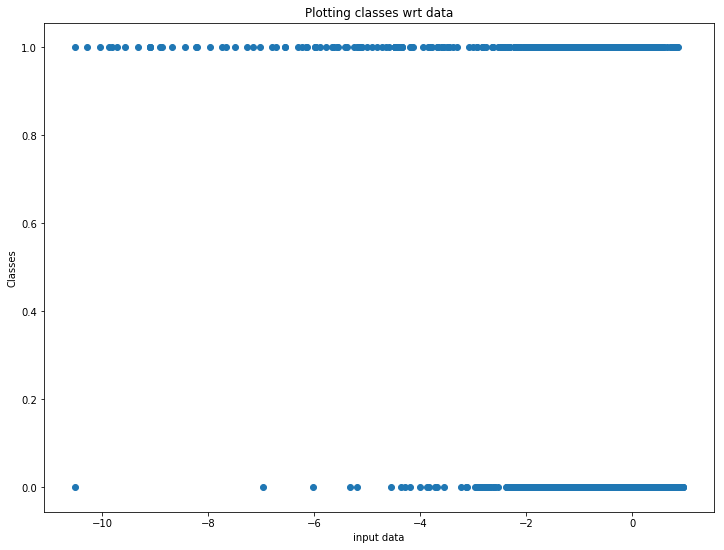

In [138]:
#Preparing the data
# data balancing
Train_0 = class0.iloc[0:6000]
Train_1 = class1

# combine
train = Train_0.append(Train_1, ignore_index=True).values

# split data into input and target
x_train = train[:,0:30].astype(float)
y_train = train[:,30]


# standardization
std_x_tr = preprocessing.StandardScaler().fit(x_train)
std_x_tr = std_x_tr.transform(x_train)

# simple plotting to grasp the data
plt.scatter(std_x_tr[:,1],y_train)
plt.legend(loc='best')
plt.xlabel('input data')
plt.ylabel('Classes')
plt.title("Plotting classes wrt data")
plt.show()


In [139]:
# testing with logistic regression   - short solution
model = linear_model.LogisticRegression()
model = model.fit(std_x_tr,y_train)

# checking the accuracy of the model
print('Logistic Regression Score',model.score(std_x_tr,y_train))
y_pred = model.predict(std_x_tr)
y_pre_pro = model.predict_proba(std_x_tr)


print('AUC Score',metrics.roc_auc_score(y_train, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_train, y_pred))
print('Classification report:\n', metrics.classification_report(y_train, y_pred))

#scoring with area under pr curve with linea regression
scoring = 'roc_auc'
kfold=5
results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print('The results of all 5 fold hand separated data:\n',results)
print("AUC: mean = {}, std = {}\n".format(results.mean(), results.std()))


Logistic Regression Score 0.987985212569
AUC Score 0.928195121951
Confusion Matrix:
 [[5992    8]
 [  70  422]]
Classification report:
              precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      6000
        1.0       0.98      0.86      0.92       492

avg / total       0.99      0.99      0.99      6492

The results of all 5 fold hand separated data:
 [ 0.91494108  0.93698653  0.89685374  0.93056122  0.94477891]
AUC: mean = 0.9248242973957259, std = 0.017082440945791668



# ROC Curve
#A ROC curve is a most commonly used way to visualize the performance of a binary classifier. 
AUC indicates that the probability of a randomly selected positive example will be scored higher by the classifier than a randomly selected negative example. If you have multiple models with nearly the same accuracy, you can pick the one that gives a higher AUC.

AUC 0.0151219512195


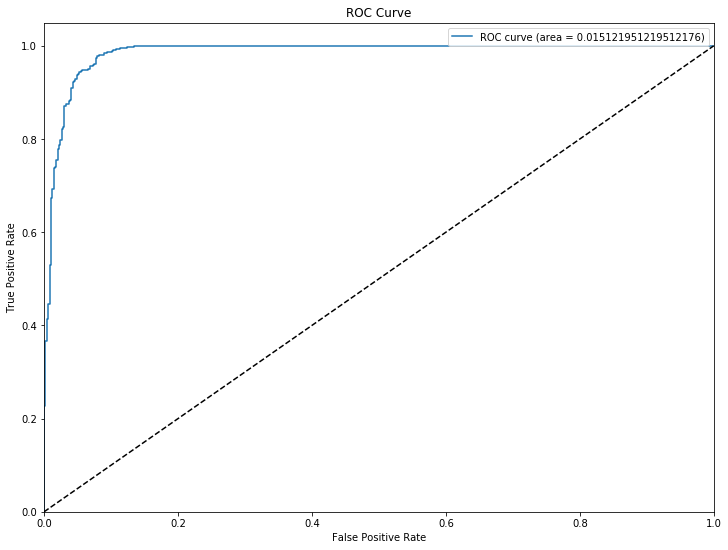

In [140]:
# Determine the false positive and true positive rates
false_pos_rate, true_pos_rate, _ = metrics.roc_curve(y_train, y_pre_pro[:,0])

# Determine AUC
roc_auc = metrics.auc(false_pos_rate, true_pos_rate)
print('AUC', roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot( true_pos_rate,false_pos_rate, label='ROC curve (area = {})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()
#---- output ----


In [133]:
# Splitting the data - using cross validation
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=.3, random_state = 0)
dt_clf = tree.DecisionTreeClassifier ()
dt_clf.fit(x_train, y_train)
y_pr = dt_clf.predict(x_train)

# train score report
cv_train_score = cross_val_score(dt_clf, x_train, y_train, scoring='accuracy', cv=5)
cv_test_score = cross_val_score(dt_clf, x_test, y_test, scoring='accuracy', cv=5)

print('training cv score: {},\n testing cv score: {}'.format(cv_train_score, cv_test_score) )
print('training cv score mean:{} and std:{},\n testing cv score mean:{} and std:{}'.format(cv_train_score.mean(),cv_train_score.std(), cv_test_score.mean(),  cv_test_score.std()))


training cv score: [ 0.97472527  0.98461538  0.97687225  0.97797357  0.97687225],
 testing cv score: [ 0.98205128  0.96666667  0.96923077  0.97429306  0.98457584]
training cv score mean:0.9782117442029337 and std:0.0033706769308831552,
 testing cv score mean:0.9753635225100521 and std:0.006985480571270245


In [125]:
# Stratified K-Fold Cross-Validation
# design the sampling
#I will use the previous model - Decision Tree
#
kfold = cross_validation.StratifiedKFold(y=y_train, n_folds=5, random_state=0)
#
train_score = []
test_score = []
for k, (itrain,itest) in enumerate(kfold):
    dt_clf.fit(x_train[itrain], y_train[itrain])
    train_score.append(dt_clf.score(x_train[itrain], y_train[itrain]))
    # score for test
    test_score.append(dt_clf.score(x_train[itest], y_train[itest]))
    print('Fold: {}, Train Accuracy: {}, Test  Accuracy: {}'.format(k+1, train_score, test_score))
print('\n Train CV accuracy: {}'.format(np.mean(train_score)))
print('Test CV accuracy: {}'.format(np.mean(test_score)))
    
#np.bincount


Fold: 1, Train Accuracy: [1.0], Test  Accuracy: [0.97032967032967032]
Fold: 2, Train Accuracy: [1.0, 1.0], Test  Accuracy: [0.97032967032967032, 0.9747252747252747]
Fold: 3, Train Accuracy: [1.0, 1.0, 1.0], Test  Accuracy: [0.97032967032967032, 0.9747252747252747, 0.98017621145374445]
Fold: 4, Train Accuracy: [1.0, 1.0, 1.0, 1.0], Test  Accuracy: [0.97032967032967032, 0.9747252747252747, 0.98017621145374445, 0.97797356828193838]
Fold: 5, Train Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0], Test  Accuracy: [0.97032967032967032, 0.9747252747252747, 0.98017621145374445, 0.97797356828193838, 0.96365638766519823]

 Train CV accuracy: 1.0
Test CV accuracy: 0.9733722224911652


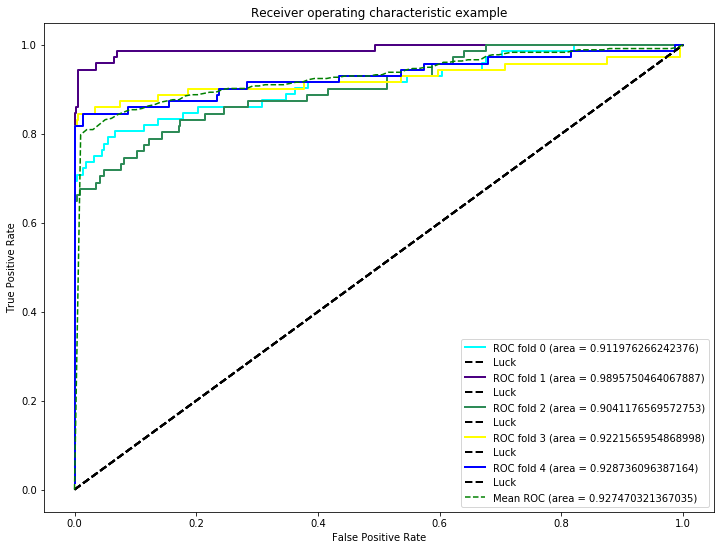

In [135]:
#Ploting and representation



# change size of Matplotlib plot
fig_size = plt.rcParams["figure.figsize"] # Get current size

old_fig_params = fig_size
# new figure parameters
fig_size[0] = 12
fig_size[1] = 9
   
plt.rcParams["figure.figsize"] = fig_size # set new size


kfold = StratifiedKFold(n_splits=5, random_state=7)
# plot roc-curve
# code adapted from http://scikit-learn.org
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'magnet', 'blue', 'darkorange'])
lw = 2

i = 0
for (train, test), color in zip(kfold.split(x_train, y_train), colors):
    probas_ = model.fit(x_train[train], y_train[train]).predict_proba(x_train[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold {} (area = {})'.format(i, roc_auc))

    i += 1

    plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Good chance')

mean_tpr /= kfold.get_n_splits(x_train, y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = {})'.format(mean_auc, lw=lw))

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The results of ROC analysis')
plt.legend(loc="best")
plt.show()

